In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_US = df[df["job_country"] == "United States"]

In [7]:
df_skills = df_US.explode('job_skills')

df_skills_count = df_skills.groupby(["job_skills", "job_title_short"]).size()

df_skills_count = df_skills_count.reset_index(name='skill_count').sort_values(by='skill_count', ascending=False)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [11]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

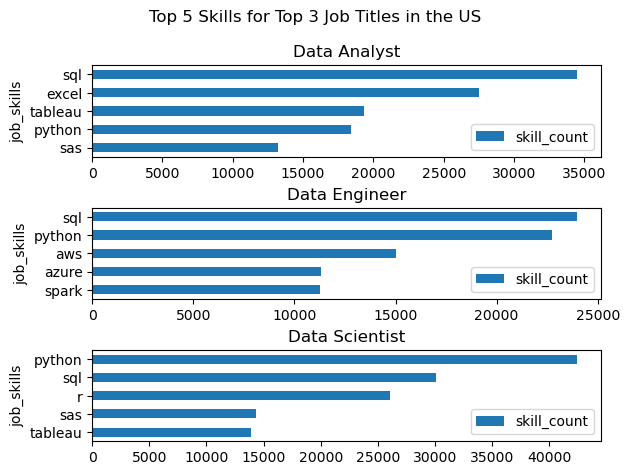

In [17]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count["job_title_short"] == job_title].head(5)
    df_plot.plot(kind="barh", x="job_skills", y="skill_count", ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    
fig.suptitle('Top 5 Skills for Top 3 Job Titles in the US')
fig.tight_layout(h_pad=0.5)
plt.show()

In [21]:
df_job_count = df_US["job_title_short"].value_counts().reset_index(name="job_totals")

In [24]:
df_skills_perc = pd.merge(df_skills_count, df_job_count, how="left", on="job_title_short")

df_skills_perc["skill_perc"] = 100 * (df_skills_perc["skill_count"] / df_skills_perc["job_totals"])

df_skills_perc

,job_skills,job_title_short,skill_count,job_totals,skill_perc
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


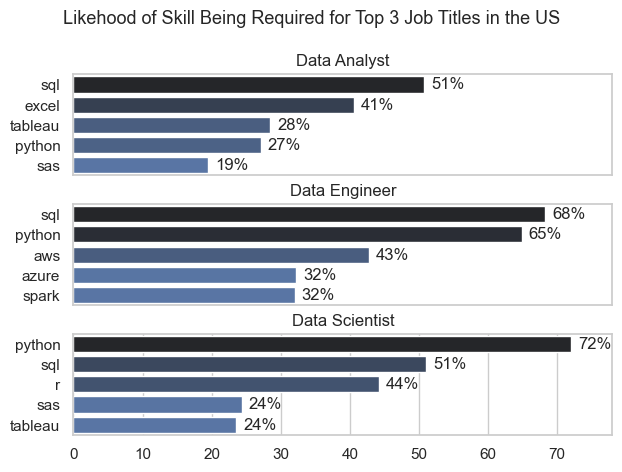

In [48]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style="whitegrid")

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc["job_title_short"] == job_title].head(5)
    sns.barplot(
        data=df_plot,
        x="skill_perc",
        y="job_skills",
        ax=ax[i],
        hue="skill_count",
        palette="dark:b_r",
        legend=False,
    )
    ax[i].set_title(job_title)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].set_xlim(0, 78)
    
    for n, v in enumerate(df_plot["skill_perc"]):
        ax[i].text(v + 1, n, f"{v:.0f}%", va="center")
        
    if i != len(job_titles) - 1:    
        ax[i].set_xticks([])

fig.suptitle(
    "Likehood of Skill Being Required for Top 3 Job Titles in the US", fontsize=13
)
fig.tight_layout(h_pad=0.5)
plt.show()